In [1]:
import pandas as pd 
import numpy as np
import netCDF4
import xarray as xr 
import matplotlib.pyplot as plt

In [2]:
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size': 14})
import matplotlib.dates as mdates

In [3]:
#In Salah region_________Import data
sol1 = xr.open_dataset('ERA5-Sahara_sol+wind100_2007-2010.nc')  #2007-01-01T00:00:00   to   2010-12-31T23:00:00
sol2 = xr.open_dataset('ERA5-Sahara_sol+wind100_2011-2014.nc')  #2011-01-01T00:00:00   to   2014-12-31T23:00:00
sol3 = xr.open_dataset('ERA5-Sahara_sol+wind100_2015-2018.nc')  #2018-12-31T22:00:00   to   2018-12-31T23:00:00

In [4]:
sol = xr.merge([sol1, sol2, sol3])

In [7]:
w = np.sqrt(np.square(sol.u100)+np.square(sol.v100))

In [8]:
ti8 = w.sel(longitude=2.25 , latitude=25.5 ,time=slice('2018-06-11T00:00','2018-07-01T23:00:00')) #The min_pearson_In_Salah_region................ . . . .. 
ti9 = w.sel(longitude=-0.5 , latitude=32.75 ,time=slice('2018-07-01T00:00','2018-07-21T23:00:00'))#Max_pearson

In [9]:
sl8 = sol.ssrd.sel(longitude=2.25 , latitude=25.5 ,time=slice('2018-06-11T00:00','2018-07-01T23:00:00'))/3600 #The min_pearson_In_Salah_region................ . . . .. 
sl9 = sol.ssrd.sel(longitude=-0.5 , latitude=32.75 ,time=slice('2018-07-01T00:00','2018-07-21T23:00:00'))/3600#Max_pearson

In [11]:
wind8 = np.array(ti8)
wind8 = pd.DataFrame(wind8)
wind9 = np.array(ti9)
wind9 = pd.DataFrame(wind9)
sun8 = np.array(sl8)
sun8 = pd.DataFrame(sun8)
sun9 = np.array(sl9)
sun9 = pd.DataFrame(sun9)

In [12]:
tii8 = w.sel(longitude=2.25 , latitude=25.5 ,time=slice('2018-04-01T00:00','2018-04-21T23:00:00')) #The min_pearson_In_Salah_region................ . . . .. 
tii9 = w.sel(longitude=-0.5 , latitude=32.75 ,time=slice('2018-04-01T00:00','2018-04-21T23:00:00'))#Max_pearson

In [13]:
sll8 = sol.ssrd.sel(longitude=2.25 , latitude=25.5 ,time=slice('2018-04-01T00:00','2018-04-21T23:00:00'))/3600 #The min_pearson_In_Salah_region................ . . . .. 
sll9 = sol.ssrd.sel(longitude=-0.5 , latitude=32.75 ,time=slice('2018-04-01T00:00','2018-04-21T23:00:00'))/3600#Max_pearson

In [14]:
wind8 = np.array(tii8)
wind8 = pd.DataFrame(wind8)
wind9 = np.array(tii9)
wind9 = pd.DataFrame(wind9)
sun8 = np.array(sll8)
sun8 = pd.DataFrame(sun8)
sun9 = np.array(sll9)
sun9 = pd.DataFrame(sun9)

In [16]:
wind_8 = ti8*100
wind_9 = ti9*120
wind__8 = tii8*80
wind__9 = tii9*80

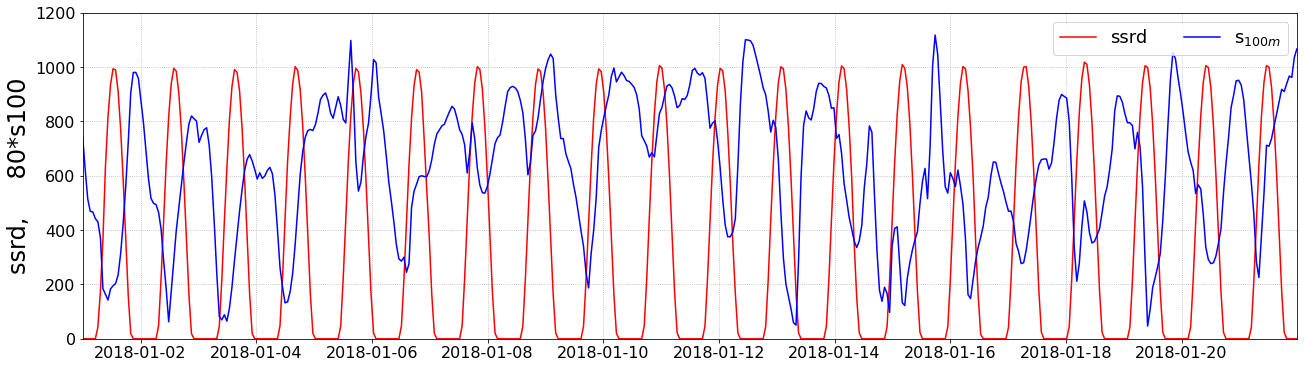

In [19]:
plt.figure(figsize=(18,5),constrained_layout=True)


time_step = pd.date_range('11/06/2018', periods=504, freq='H')
step = np.linspace(0.0, 22, 504)
#time_step.strftime("%H:00")
plt.plot(step, sl8, label=r'ssrd', color='red')
plt.plot(step, wind_8, label= r's$_{100m}$', color='blue')

#---------------------------------

#plt.xticks(fontsize=16)
plt.xticks(np.arange(1, 21, step=2), fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel('Hour',fontname='Century',fontsize=24, color='black' ,fontweight='bold')
plt.ylabel(r'ssrd,     80*s100',fontsize=24, color='black')
#plt.legend(fontsize=12, loc='upper left')
plt.legend(loc='upper right', ncol=2, fontsize=18)
plt.xlim(0, 21, '%d')
plt.ylim(0, 1200)

dtFmt = mdates.DateFormatter('2018-%m-%d') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis



plt.grid(linestyle='dotted',which='major', axis='y')
plt.grid(linestyle='dotted',which='both', axis='x')
plt.show()
#plt.plot(rolling.index, rolling[0], color='red', linewidth=3)

<Figure size 1008x216 with 0 Axes>

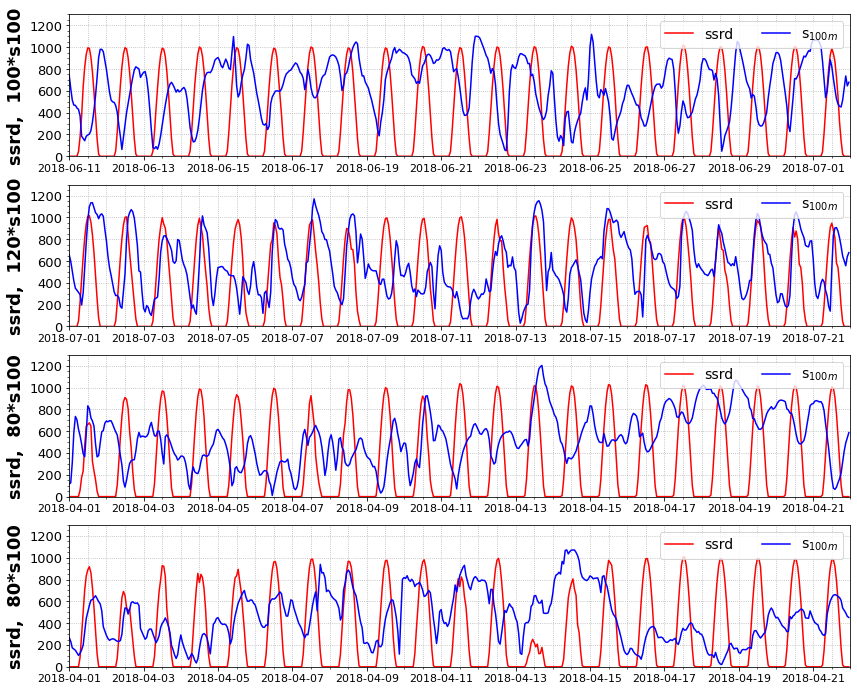

In [26]:
plt.figure(figsize=(14,3),constrained_layout=True)

#-----------------------------------------------------------------------------------------------------
times0 = np.arange(np.datetime64('2018-06-11T00'),
                  np.datetime64('2018-07-02T00'))
times1 = np.arange(np.datetime64('2018-07-01T00'),
                  np.datetime64('2018-07-22T00'))
times2 = np.arange(np.datetime64('2018-04-01T00'),
                  np.datetime64('2018-04-22T00'))
times3 = np.arange(np.datetime64('2018-04-01T00'),
                  np.datetime64('2018-04-22T00'))
#_____________________________________________________________________________________________________
fig, axs = plt.subplots(4, figsize=(14,12))
#fig.suptitle('Vertically stacked subplots')

plt.yticks(fontsize=24);
#-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
axs[0].plot(times0, sl8, label=r'ssrd', color='red')
axs[0].plot(times0, wind_8, label= r's$_{100m}$', color='blue')
axs[0].set_xlim(np.datetime64('2018-06-11T00'),np.datetime64('2018-07-02T00'), '%d')
axs[0].set_xticks(np.arange(np.datetime64('2018-06-11T00'),np.datetime64('2018-07-02T00'), step=48))
axs[0].set_ylabel(r'ssrd,  100*s100',fontsize=18, fontweight = 'bold',color='black')
#________________......_______________.....______________.........___________________........_________
axs[1].plot(times1, sl9, label=r'ssrd', color='red')
axs[1].plot(times1, wind_9, label= r's$_{100m}$', color='blue')
axs[1].set_xlim(np.datetime64('2018-07-01T00'),np.datetime64('2018-07-22T00'), '%d')
axs[1].set_xticks(np.arange(np.datetime64('2018-07-01T00'),np.datetime64('2018-07-22T00'), step=48))
axs[1].set_ylabel(r'ssrd,  120*s100',fontsize=18, fontweight = 'bold', color='black')
#________________......_______________.....______________.........___________________........_________
axs[2].plot(times2, sll8, label=r'ssrd', color='red')
axs[2].plot(times2, wind__8, label= r's$_{100m}$', color='blue')
axs[2].set_xlim(np.datetime64('2018-04-01T00'),np.datetime64('2018-04-22T00'), '%d')
axs[2].set_xticks(np.arange(np.datetime64('2018-04-01T00'),np.datetime64('2018-04-22T00'), step=48))
axs[2].set_ylabel(r'ssrd,  80*s100',fontsize=18, fontweight = 'bold',color='black')
#________________......_______________.....______________.........___________________........_________
axs[3].plot(times3, sll9, label=r'ssrd', color='red')
axs[3].plot(times3, wind__9, label= r's$_{100m}$', color='blue')
axs[3].set_xlim(np.datetime64('2018-04-01T00'),np.datetime64('2018-04-22T00'), '%d')
axs[3].set_xticks(np.arange(np.datetime64('2018-04-01T00'),np.datetime64('2018-04-22T00'), step=48))
axs[3].set_ylabel(r'ssrd,  80*s100',fontsize=18, fontweight = 'bold',color='black')
#_____________________________________________________________________________________________________

for i in range(0,4):
    
    axs[i].set_ylim(0, 1300)
    axs[i].set_yticks(np.arange(0, 1201, step=200)) 
    axs[i].minorticks_on()
    axs[i].tick_params(axis='x', labelsize=11)
    axs[i].tick_params(axis='y', labelsize=13)
    axs[i].grid(linestyle='dotted',which='major', axis='y')
    axs[i].grid(linestyle='dotted',which='both', axis='x')
    axs[i].legend(loc='upper right', ncol=2, fontsize=14)




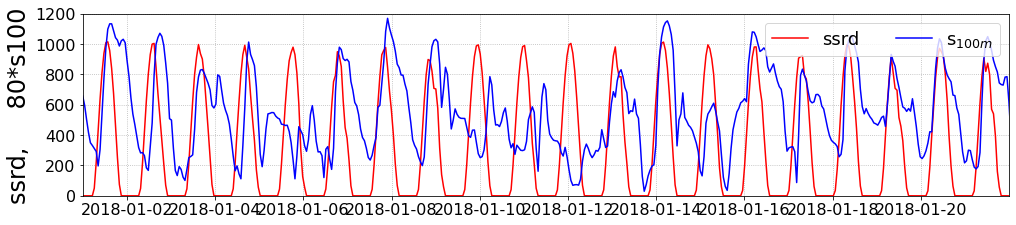

In [24]:
plt.figure(figsize=(14,3),constrained_layout=True)

time_step = pd.date_range('11/06/2018', periods=528, freq='H')
step = np.linspace(0.0, 22, 504)
#time_step.strftime("%H:00")
plt.plot(step, sl9, label=r'ssrd', color='red')
plt.plot(step, wind_9, label= r's$_{100m}$', color='blue')

#---------------------------------

#plt.xticks(fontsize=16)
plt.xticks(np.arange(1, 21, step=2), fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel('Hour',fontname='Century',fontsize=24, color='black' ,fontweight='bold')
plt.ylabel(r'ssrd,     80*s100',fontsize=24, color='black')
#plt.legend(fontsize=12, loc='upper left')
plt.legend(loc='upper right', ncol=2, fontsize=18)
plt.xlim(0, 21, '%d')
plt.ylim(0, 1200)

dtFmt = mdates.DateFormatter('2018-%m-%d') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis



plt.grid(linestyle='dotted',which='major', axis='y')
plt.grid(linestyle='dotted',which='both', axis='x')
plt.show()
#plt.plot(rolling.index, rolling[0], color='red', linewidth=3)